# Introduction

## Research direction

Our research aims to find which factors contribute most to shopping behavior. Nowadays, online shopping become one of the most important parts of the business world. It is necessary to grasp the user’s buying habits and predict their shopping intention. Using these analysis results and prediction to improve shopping websites and applications can improve the sales and profit of these companies.

## Rational

These data on users’ activities and shopping behavior have some relationships. And these relationships can be used to build a prediction model to predict users’ intentions. In that case, online shopping websites can improve their design and push more exact commodities and repo to get higher sales and profit. Meanwhile, customers will have a better shopping experience. Moreover, this analysis is a good reference for a merchant to improve their service and product. Shopping websites and applications also can refer to this model for their marketing strategy. Therefore, this research is meaningful and beneficial to many parties.

## Methods
We will use several models to predict customers' intentions to purchase products online. These models will help us identify the most significant variables that affect customers' behavior and preferences. Additionally, we will use data visualization techniques to explore the relationships between variables and provide a clear understanding of the data.

## Online Shoppers Purchasing Intention Dataset

### The dataset is about customers’ scanning time, exiting rate, browsing pages, and other information which is relevant to their shopping intention. The dataset is highly consistent with our study. It includes almost every element we’d like to analyze.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 

"Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. " The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. "

"Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year. 

In [98]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [99]:
#import train data
data = pd.read_csv("online_shoppers_intention.csv")
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# Data processing

In [100]:
# Null values checking 
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [102]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


## Dataset Summary

The dataset has 12330 observations without null values. So, we don’t need to do data cleaning. But there are 18 variables, which means too many independent variables. We don’t need to use all of them. Especially, some variables may have multicollinearity with the dependent variable. So, we need to pick up several most relevant variables used in the model. The specific variables will be decided when modeling.

## Select Variables

In [103]:
df = pd.get_dummies(data)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

# Survival Analysis

## Kaplan-Meier analysis

Kaplan-Meier analysis can be used to calculate the probability of an event happening over time.

For this dataset, we can find the relations amoung Administrative_Duration, Informational_Duration, ProductRelated_Duration and revenue.

In [106]:
pip install lifelines

Note: you may need to restart the kernel to use updated packages.


In [108]:
#Make the variable of Revenue into int
df['Revenue'] = df['Revenue'].map(lambda x: 0 if x == False else 1)
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,0,0,0,0,0,0,0,0,0,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,0,0,0,0,1,0,0,0,0,1
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,0,0,0,0,1,0,0,0,0,1
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,0,0,0,0,1,0,0,0,0,1


### Administrative_Duration & Revenue

In [112]:
df_AD = df[df["Administrative_Duration"]!=0]

In [113]:
# Split into two groups based on median calcium level
median_calc = df_AD["Administrative_Duration"].median()
low_calc = df_AD[df_AD["Administrative_Duration"] < median_calc]
high_calc = df_AD[df_AD["Administrative_Duration"] >= median_calc]

<AxesSubplot:xlabel='timeline'>

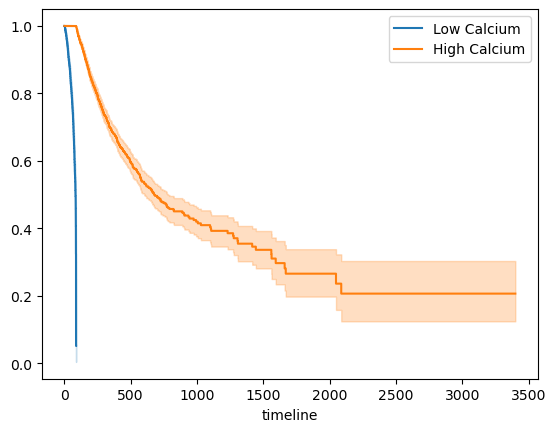

In [114]:
# Create a Kaplan-Meier survival curve using the "lifelines" package
import lifelines
from lifelines import KaplanMeierFitter

# create a Kaplan-Meier estimator
kmf_low = KaplanMeierFitter()
kmf_high = KaplanMeierFitter()

## Fit the data into the model
kmf_low.fit(low_calc.Administrative_Duration, low_calc.Revenue,label='Low Calcium')
kmf_high.fit(high_calc.Administrative_Duration, high_calc.Revenue, label="High Calcium")

# Plot Kaplan-Meier curves for low and high calcium groups
kmf_low.plot()
kmf_high.plot()

In [115]:
# Performing log-rank test
from lifelines.statistics import logrank_test
results = logrank_test(low_calc['Administrative_Duration'], high_calc['Administrative_Duration'], low_calc['Revenue'], high_calc['Revenue'])
print(results)

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
        1710.89 <0.005       inf


The p-value is <0.005. That means we can reject the null hypothesis that the survival rates of the two groups are equal. Therefore, we can conclude that the survival rates of the low and high calcium groups are statistically different from each other.

### Informational_Duration & Revenue

In [77]:
df_ID=df[df["Informational_Duration"]!=0]

<AxesSubplot:xlabel='timeline'>

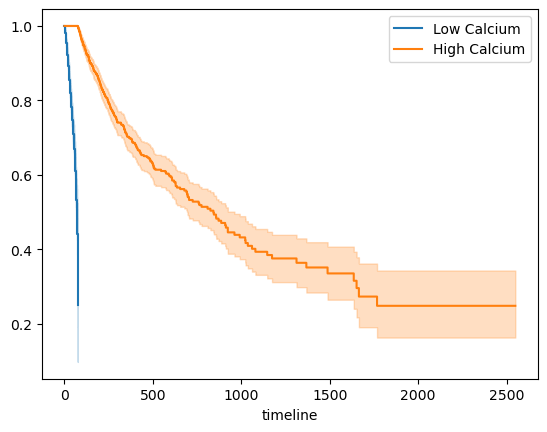

In [78]:
median_calc = df_ID["Informational_Duration"].median()
low_calc = df_ID[df_ID["Informational_Duration"] < median_calc]
high_calc = df_ID[df_ID["Informational_Duration"] >= median_calc]

# create a Kaplan-Meier estimator
kmf_low = KaplanMeierFitter()
kmf_high = KaplanMeierFitter()

# Fit the data into the model
kmf_low.fit(low_calc.Informational_Duration, low_calc.Revenue,label='Low Calcium')
kmf_high.fit(high_calc.Informational_Duration, high_calc.Revenue, label="High Calcium")

# Plot Kaplan-Meier curves for low and high calcium groups
kmf_low.plot()
kmf_high.plot()

In [79]:
# Performing log-rank test
from lifelines.statistics import logrank_test
results = logrank_test(low_calc['Informational_Duration'], high_calc['Informational_Duration'], low_calc['Revenue'], high_calc['Revenue'])
print(results)

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         610.84 <0.005    445.59


### ProductRelated_Duration & Revenue

In [80]:
df_PD = df

In [83]:
# Split into two groups based on median calcium level
median_calc = df_PD["ProductRelated_Duration"].median()
low_calc = df_PD[df_PD["ProductRelated_Duration"] < median_calc]
high_calc = df_PD[df_PD["ProductRelated_Duration"] >= median_calc]

<AxesSubplot:xlabel='timeline'>

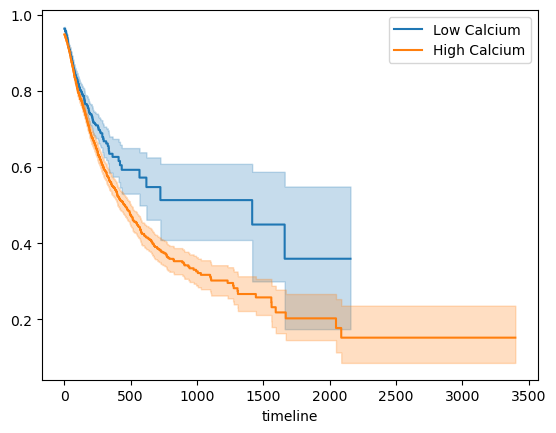

In [84]:
# Create a Kaplan-Meier survival curve using the "lifelines" package
import lifelines
from lifelines import KaplanMeierFitter

# create a Kaplan-Meier estimator
kmf_low = KaplanMeierFitter()
kmf_high = KaplanMeierFitter()

## Fit the data into the model
kmf_low.fit(low_calc.Administrative_Duration, low_calc.Revenue,label='Low Calcium')
kmf_high.fit(high_calc.Administrative_Duration, high_calc.Revenue, label="High Calcium")

# Plot Kaplan-Meier curves for low and high calcium groups
kmf_low.plot()
kmf_high.plot()

In [85]:
# Performing log-rank test
from lifelines.statistics import logrank_test
results = logrank_test(low_calc['ProductRelated_Duration'], high_calc['ProductRelated_Duration'], low_calc['Revenue'], high_calc['Revenue'])
print(results)

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
        2039.41 <0.005       inf


# LogisticRegression

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Define the dependent variable
y = df['Revenue']

# Define the independent variables
X = df.drop('Revenue', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Fit the logistic regression model
model = sm.Logit(y, X)
result = logit_model.fit()

#Evaluate the model
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [132]:
# Get the coefficients and intercept
coef = model.coef_
intercept = model.intercept_

# Print the coefficients and intercept
print("Coefficients:", coef)
print("Intercept:", intercept)


Coefficients: [[-9.95020824e-03  4.01509565e-04 -4.07497232e-03 -4.80730215e-05
   9.34137015e-04  8.55116710e-05 -8.30722451e-03 -1.33485191e-02
   8.37919973e-02 -1.85050009e-02 -3.05890364e-01 -2.35389464e-01
  -2.23888886e-01 -4.71385588e-02 -2.63168081e-02 -4.34174954e-03
  -3.95428865e-02 -7.64600789e-03 -4.97889166e-03 -5.86187857e-03
  -4.87688851e-02 -7.18756634e-02  2.23678898e-02 -3.98157284e-03
  -3.46361841e-03 -3.85272786e-03  1.12627005e-03 -1.65366806e-01]]
Intercept: [-0.16811177]


In [134]:
df.dtypes

Administrative                     int64
Administrative_Duration          float64
Informational                      int64
Informational_Duration           float64
ProductRelated                     int64
ProductRelated_Duration          float64
BounceRates                      float64
ExitRates                        float64
PageValues                       float64
SpecialDay                       float64
OperatingSystems                   int64
Browser                            int64
Region                             int64
TrafficType                        int64
Weekend                             bool
Revenue                            int64
Month_Aug                          uint8
Month_Dec                          uint8
Month_Feb                          uint8
Month_Jul                          uint8
Month_June                         uint8
Month_Mar                          uint8
Month_May                          uint8
Month_Nov                          uint8
Month_Oct       

In [133]:
# Create a DataFrame of independent variables
X = df.drop('Revenue', axis=1)
# Define the dependent variable
y = data['Revenue']

model = sm.Logit(y, X)
result = model.fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

## Select Models

# Implications

It is feasible to build a machine learning model to predict purchase intention in an e-commerce environment...........

# Limitations

For now, we assume that product related page may be the most relevant factor. And there is doubt that whether administration duration has a significant impact on the probability of an event occurring. But these need to be proven in the analysis process.

We kind of worry there may be a limitation of this dataset. It does provide the duration time and customers’ browsing time for us. But all these variables are generated from the website angle. We don’t get the information on customers’ profiles. What if the most important factor is the characteristics of customers rather than the website’s design? This is an unknown question to us.